## <a id='toc1_'></a>[Model Project](#toc0_)


## <a id='toc1_'></a>[Data importing and packages/libraries](#toc0_)


**Extensions and packages / libraries**

In [17]:
!pip install yfinance
!pip install pandas-datareader
!pip install matplotlib inline

#https://pypi.org/project/yfinance/

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import sympy as sp
import scipy.optimize
from datetime import datetime
from types import SimpleNamespace
import random
from IPython.display import display

pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False) 

**Importing our data, and structure dataframe**

In [18]:
#Number of simulations in Monte Carlo (lower to run the code faster):
sim_num = 10000

# Needed values and naming for our different models:
overview={}
risk=[-2,0,2]
all_models=['Monte Carlo','Numerical Optimization','Monte Carlo Extended model Risk-Seeking ','Monte Carlo Extended model Risk-Neutral','Monte Carlo Extended model Risk-Averse',
'Numerical Optimization Risk-Seeking','Numerical Optimization Risk-Neutral','Numerical Optimization Risk-Averse']


# Importing Data

# Define a list of ticker symbols
tickers = ['AAPL', 'MSFT', 'AMZN', 'JNJ', 'PG', 'BRK-A', 'JPM', 'XOM', 'V', 'T']
interest_rate=['^TNX']

# Ticker tests
#tickers = ['AAPL','MSFT','SQ']
#tickers = ['JNJ','PG','V','AMZN','XOM','T']

# Downloading data for each ticker and selecting period
data_period = "2013-01-01"
end_date = "2023-01-01"
#end_date = datetime.now().strftime('%Y-%m-%d')

dfs = {}
for x in tickers:
    dfs[x] = yf.download(x, start=data_period,end=end_date)['Close']

# Downloading data for interest rate
interest_rate=yf.download(interest_rate, start=data_period, end=end_date)['Close']


# Concatenating the dataframes into a single dataframe
df = pd.concat(dfs, axis=1)
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,AMZN,JNJ,PG,BRK-A,JPM,XOM,V,T
Date,,,,,,,,,,
2013-01-02,19.608213,27.620001,12.8655,70.839996,69.389999,139610.0,44.660000,88.709999,38.845001,26.435045
2013-01-03,19.360714,27.250000,12.9240,70.739998,68.949997,140549.0,44.570000,88.550003,38.875000,26.450151
2013-01-04,18.821428,26.740000,12.9575,71.550003,69.089996,140803.0,45.360001,88.959999,39.192501,26.608761
2013-01-07,18.710714,26.690001,13.4230,71.400002,68.620003,140190.0,45.410000,87.930000,39.472500,26.729607
2013-01-08,18.761070,26.549999,13.3190,71.410004,68.510002,141000.0,45.500000,88.480003,39.840000,25.944109


## <a id='toc1_'></a>[Model Description](#toc0_)


**Introduction to model project**

Our model project seeks to combine the classical mean variance model (MVO) which is widely used within the financial portofolio theory, and combine this classical theory with a modern measurement of portofolio risk versus returns. This is done by using the Sharpe ratio in combination with the Markowitz model. In the MVO model the efficient frontier represents the portofolio that offers the highest return for a certain level of risk. The Sharpe ratio measures the excess return of a portofolio relative to the risk-free return. In this assignment we will construct a portofolio consisting of 10 large companies within the S&P500 index from different sectors, and use the 10 year Treasure Yield as the interest rate. 

Having found these different portofolios at the efficient frontier we will use the Sharpe ratio to evaluate and compare the different portofolios laying on the efficient frontier.  

**Presentation of the MVO model**

There exists $n$ stocks which return $r$ are normally distributed with a return vector $\mu$ and return covariance metrix $\Sigma$

Portofolio holding $h$ are determined by solving the mean-variance optimization (MVO) problem:  $$\max \mu_p - \frac{\lambda}{2}  \sigma^2_p$$

   $\mu_p$ is the expected portofolio return 

   $\sigma^2_p$ is the portofolio variance 
   
   $\lambda$ is the investors risk aversion 

If: 

   $$\lambda = 0 \ the \ investor \ is \ risk \ neutral$$

   $$\lambda < 0 \ the \ investor \ is \ risk \ seeking$$
   
   $$\lambda > 0 \ the \ investor \ is \ risk \ averse$$


The optimal portofolio holding/weights for an investor is given by: $$ h^{*} = \lambda^{-1} \Sigma^{-1} \mu$$ 

**Presentation of the Sharpe Ratio**

Mathematically the Sharpe ratio is defined as: $$ Sharpe \  Ratio = \frac{R_p - R_f} {\sigma_p}$$

Where:
    
$ \ \ \ \  R_p $ = Return of portofolio 

$ \ \ \ \  R_f $ = Return of risk-free asset

$ \ \ \ \  \sigma^p $ = Standard Deviation of Portofolio's excess return 


**Modified Sharpe Ratio**

From the MVO model we will incorporate the investors risk-aversion into the Sharpe Ratio, and find the optimal portofolio:

$$ Adjusted \ Sharpe \ Ratio = \frac{R_p^{adjusted} - R_f} {\sigma_p}$$

Where:

$ R_p^{adjusted} =\  \mu_p - \frac{\lambda}{2}  \sigma^2_p =\  h_i =\  \lambda^{-1} \Sigma^{-1} \mu $ 

$ \sigma^p = \sqrt{(w_{i}^2 \sigma_i^2) + (w_{j}^2 \sigma_j^2) + (2w_{j}w_{i} p_{i,j} \sigma_i \sigma_j)}$










## <a id='toc1_'></a>[Analytical Soluton](#toc0_)






**Analytical solution is not possible without a lot of spare time**

The Sharpe Ratio optimization problem is a complex problem which involces covariances, variances as well as expected returns. This is not possible to solve with calculus for more than two risky assets, due to the complexity of the correlations between the assets. 

We will show that it is not possible to derive the optimal portofolio weights even for a portofolio consisting of two assets, however we do a general examples without inserting values for the returns and volatilty - which will lead to 3 equations with 3 unknown, and therefore again require numerical optimization. 


**Definitions**

Expected return for the portofolio is a weighted sum of the expected returns of the assets:
$$ R_p = w_1R_1+w_2R_2 $$

The Variance of the portofolio is given by:
$$ \sigma^2_p = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho\sigma_1\sigma_2 $$

    
$ \ \ \ $ Where: $\rho $ is the correlation between the returns of the two assets

The Sharpe ratio:
$$ S = \frac{R_p - R_f} {\sigma_p}$$
**Analytical solution to a two asset portofolio**

We seek to find the weights $w_1$ and $w_2$ that maximize the Sharpe Ratio $S$ under the constraint that the weights must sum to 1:
$$ w_1 + w_2 = 1 $$

Now you can set up the Lagrangian function for the problem:
$$ L = \frac{w_1*R_1 + w_2*R_2 - R_f} {\sqrt{(w_1^2*σ_1^2 + w_2^2*σ_2^2 + 2*w_1*w_2*\rho*σ_1*σ2_)}} + \lambda*(w_1 + w_2 - 1) $$



Taking the partial derivatives of L with respect to $w_1$:
$$ \frac{\partial L}{\partial w_1}=0 $$
$$ => \frac{R_1 - S*(w_1*σ_1^2 + w_2*ρ*σ_1*σ_2)} {w_1^2*σ_1^2 + w_2^2*σ_2^2 + 2*w_1*w_2*ρ*σ_1*σ_2} = -λ $$



Taking the partial derivatives of L with respect to $w_2$:
$$ \frac{\partial L}{\partial w_2}=0 $$
$$ => \frac{R_2 - S*(w_2*σ_2^2 + w_1*ρ*σ_1*σ_2)} {w_1^2*σ_1^2 + w_2^2*σ_2^2 + 2*w_1*w_2*ρ*σ_1*σ_2} = -λ $$



Taking the partial derivatives of L with respect to $\lambda$:
$$ w_1 + w_2 = 1 $$










## <a id='toc1_'></a>[Numerical Solution](#toc0_)












**Introduction to numerical optimization**

As stated in the analytical solution our optimization problem is not easy to solve analytically, especially when you have a portofolio consisting of 10 assets as we have choosen. This is due to the Sharpe Ratio it self is a ratio of expected returns and standard deviation, which are both functions of the portofolio weights. This becomes a nonlinear and complex optimization problem. 

Despite not being a numerical optimization we start this section by presenting a simple and pretty accurate way to find the optimal portofolio weights as well as the Sharpe ratio. This is done by running a Monte Carlo simulation. Later on we turn to the numerical optimization where we use the scipy "minimize" and compare the outcomes from the two different methods. 


**Monte Carlo Simulation**

The Monte Carlo simulation is a computational tool which uses randomness to solve the problem. This method of estimating value of an unkown quantity uses the principles of statistics. Here is how the simulations is done:

   1. Randomly generating a large number of portofolio weights 
   2. For each randomly generated portofolio, calculate expected return and risk (standard deviation)
   3. From the expected return and risk, we can calculate the sharp ratio for the portofolio
   4. Having found the Sharpe Ratio for all the portofolios, we identify the portofolio with the highest Sharpe Ratio. 


**Defining functions and equatios to calculate Sharpe Ratios**

In [19]:


def sharpe(x):
    np.random.seed(999)

    # Taking log to the returns
    l_return = np.log(1 + x.pct_change())

    # Making random weights
    random_weights = np.array(np.random.random(len(x.columns)))

    # Making sure the random weights adds to 1
    adjusted_weights = random_weights / np.sum(random_weights)

    # Annualize expected returns and subtracting the interest rate as a decimal
    exp_return = np.sum(((l_return.mean() * adjusted_weights) * 252))-interest_rate.mean()/100

    # Doing the same for the volatility
    exp_volatility = np.sqrt(np.dot(adjusted_weights.T, np.dot(l_return.cov() * 252, adjusted_weights)))

    return l_return, random_weights, adjusted_weights, exp_return, exp_volatility

# Assigning the returns to given values:
l_return, random_weights, adjusted_weights, exp_return, exp_volatility = sharpe(df)


**Testing the cell above to see if the adjusted weights and portofolio metrics are done correct**

In [20]:
# Visualizing the random weights and the Sharpe Ratio

# Sharpe Ratio
sharpe_ratio = exp_return / exp_volatility

# Weights
weights_df = pd.DataFrame(data={'random_weights': random_weights, 'adjusted_weights': adjusted_weights})
display(weights_df)

# Metrics
portfolio_df = pd.DataFrame(data={'Expected Portfolio Returns': exp_return, 'Expected Portfolio Volatility': exp_volatility, 'Portfolio Sharpe Ratio': sharpe_ratio}, index=['values'])
display(portfolio_df)

,random_weights,adjusted_weights
0,0.803428,0.166680
1,0.527522,0.109440
2,0.119111,0.024711
3,0.639681,0.132709
4,0.090925,0.018863
5,0.332226,0.068924
6,0.427381,0.088665
7,0.554386,0.115013
8,0.628127,0.130312
9,0.697393,0.144682


,Expected Portfolio Returns,Expected Portfolio Volatility,Portfolio Sharpe Ratio
values,0.089277,0.175909,0.507522


**Creating the Monte Carlo Simulation**

In [21]:
# Monte Carlo Simulation
np.random.seed(999)

# Number of simulations
num_of_portfolios = sim_num

# Making empty arrays
sharpe_array = np.zeros(num_of_portfolios)
return_array = np.zeros(num_of_portfolios)
volatility_array = np.zeros(num_of_portfolios)
total_weights = np.zeros((num_of_portfolios, len(df.columns)))

# Simulation
for k in range(num_of_portfolios):

    # Weights
    random_weights = np.array(np.random.random(len(df.columns)))

    # Making sure the random weights adds to 1
    weights = random_weights / np.sum(random_weights)

    # Concatinating
    # weights
    total_weights[k, :] = np.round(weights,6)
    # return
    return_array[k] = np.sum((l_return.mean() * weights) * 252)-interest_rate.mean()/100
    # volatility
    volatility_array[k] = np.sqrt(np.dot(weights.T, np.dot(l_return.cov() * 252, weights)))
    # sharpe ratio
    sharpe_array[k] = return_array[k]/volatility_array[k]

# combining all and transpose
montecarlo_data = [return_array, volatility_array, sharpe_array, total_weights]
montecarlo_df = pd.DataFrame(data=montecarlo_data).T
montecarlo_df = montecarlo_df.infer_objects()

# Column names
montecarlo_df.columns = ['Returns', 'Volatility', 'Sharpe Ratio', 'Portfolio Weights']

opt_sharpe = montecarlo_df.loc[montecarlo_df['Sharpe Ratio'].idxmax()]
opt_sharpe = pd.DataFrame(opt_sharpe).T
min_volatility = montecarlo_df.loc[montecarlo_df['Volatility'].idxmin()]
min_volatility = pd.DataFrame(min_volatility).T

# For our overview
opt_sharpe['Model focusing on Sharpe Ratio']=all_models[0]
overview[all_models[0]]=opt_sharpe


**Printing the optimal Sharpe Ratio and the minimum risk portofolio from the simulation**

In [22]:
print('Optimal Sharpe ratio')
display(opt_sharpe)

print('Min Volatility ratio')
display(min_volatility)

Optimal Sharpe ratio


,Returns,Volatility,Sharpe Ratio,Portfolio Weights,Model focusing on Sharpe Ratio
1197,0.140703,0.196008,0.717844,"[0.070156, 0.22848, 0.154768, 0.065421, 0.036352, 0.144617, 0.043678, 0.017559, 0.232672, 0.006296]",Monte Carlo


Min Volatility ratio


,Returns,Volatility,Sharpe Ratio,Portfolio Weights
4972,0.074758,0.150205,0.497707,"[0.067969, 0.007735, 0.019248, 0.293179, 0.289442, 0.183352, 0.024205, 0.019526, 0.033084, 0.06226]"


**Plotting the Efficient Frontier, where the portofolio with the highest Sharpe Ratio is marked with a red cross and the one with minimum volatity is marked with a navy croos**

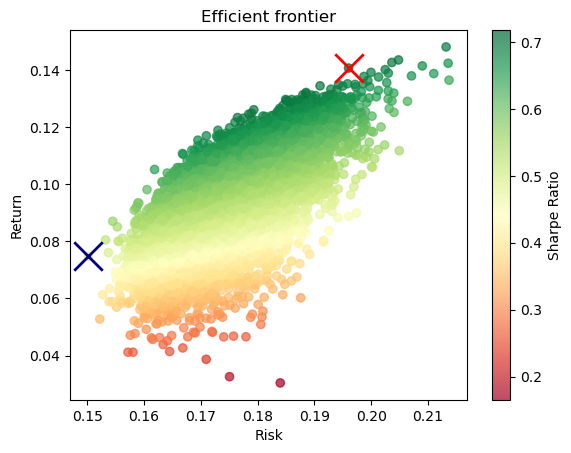

In [23]:
# Creating plot
plt.scatter(x=montecarlo_df['Volatility'], c=montecarlo_df['Sharpe Ratio'], y=montecarlo_df['Returns'], cmap='RdYlGn', alpha=0.7)
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient frontier')
plt.colorbar(label='Sharpe Ratio')

# Minimum Volatility ratio shown as a navy cross
plt.scatter(min_volatility['Volatility'], min_volatility['Returns'], marker="x", linewidths=2, color='navy', s=420)

# Optimal Sharpe ratio shown as a red cross
plt.scatter(opt_sharpe['Volatility'], opt_sharpe['Returns'], marker="x", linewidths=2, color='red', s=420)

plt.show()

## <a id='toc1_'></a>[Results:](#toc0_)

Minimum Risk (Blue Cross) = This portfolio with the minimum risk (standard deviation) of all the portfolios laying on the frontier. This portfolio has a Sharpe Ratio of 0.41 and would have generated a 6.3% return, with 0.15 volatility meaning the portfolio can fluctuate 15% aorund its value.

Maximum Sharpe Ratio (red Cross) = This portfolio with the highest risk-adjusted return. This portfolio has a Sharpe Ratio of 0.68 and would have generated a 12.4% return with 0.18 meaning the portfolio can fluctuate 18% aorund its value.

**Numerical optimization with scipy.minimize**

Numerical optimization is an algorithm that can be used to find the maximum of a function, and in our case used to optimize a function that is complex and nonlinear. This is done by iteration and adjusting the unputs to the funtion. In our case the input will be the portofolio weights to find the inputs that leads to the highest Sharpe Ratio:
  
  1. Provide scipy with the function you want to maximize (Sharpe Ratio)
  2. Provide it with an initial guess (equal weights) and the constraint the weights must sum to 1
  3. The algoritm then iteratively adjust the inputs to mazimize the Sharpe Ratio

**Start by creating the function and arrays for the numerical optimization**

In [24]:
# Printing matrics for a better view:
def print_array(list):
    print('')
    for i,p in zip(list,['Return       ','Volatility   ','Sharpe Ratio ']):
        print(p,np.round(i,4))
    print('')

# Helping value for overview
overview_count=len(overview)

# Optimization scipy
def func_opt(weights):
        
    # Weights
    weights = np.array(weights)

    # Annualize returns
    returns = np.sum((l_return.mean() * weights) * 252)-interest_rate.mean()/100

    # Annualize volatility
    volatility = np.sqrt(np.dot(weights.T, np.dot(l_return.cov() * 252, weights)))

    # Sharpe ratio
    sharpe = returns / volatility

    return np.array([returns, volatility, sharpe])

**Adjusting our Sharpe Ratio to the minimize optimization, this is done by rewriting with the neg_sharpe_opt function**

In [25]:
def neg_sharpe_opt(weights):
    return func_opt(weights)[2]**(-1)

def volatility_opt(weights):
    return func_opt(weights)[1]  

def add_up(weights):
    return np.sum(weights) - 1

**Setting up the constraint, initial guess and boundries for the optimization process**

In [26]:
# Making sure we can maximum invest 100% in one stock
bounds = tuple((0, 1) for symbol in range(len(df.columns)))

# Weights can't sum to more than 1
constraints = ({'type': 'eq', 'fun': add_up})

# Even initial guess defined by the length of tickers (equal allocation in each asset)
init_guess = len(df.columns) * [1 / len(df.columns)]

**Running the optimization process for the minimum variance portfolio and the maximum sharpe ratio**

In [27]:
# Minimize for negative sharpe ratio
optimized_sharpe = scipy.optimize.minimize(neg_sharpe_opt, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Minimize for volatility
optimized_volatility = scipy.optimize.minimize(volatility_opt, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Getting values from func_opt (return, volatility and sharpe ratio)
optimized_metrics = func_opt(optimized_sharpe.x)
optimized_metrics_v = func_opt(optimized_volatility.x)

# For our overview
add_overview=pd.DataFrame(optimized_metrics).T
add_overview.columns = ['Returns', 'Volatility', 'Sharpe Ratio']
add_overview['Portfolio Weights']=[np.round(optimized_sharpe.x.tolist(),6)]
add_overview['Model focusing on Sharpe Ratio']=all_models[overview_count]
overview[all_models[overview_count]]=add_overview

**Printing the results from the optimization process**

In [28]:
#Optimization
print('')
print('OPTIMIZED SHARPE RATIO:')
display(optimized_sharpe)
    
print('.'*100)
print('')
print('OPTIMIZED SHARPE RATIO WEIGHTS:')
display((optimized_sharpe.x))

print('.'*100)
print('')
print('OPTIMIZED SHARPE RATIO METRICS:')
print_array(optimized_metrics)
print('='*100)

#Volatility
print('')
print('OPTIMIZED VOLATILITY RATIO:')
display(optimized_volatility)

print('.'*100)
print('')
print('OPTIMIZED VOLATILITY RATIO WEIGHTS:')
display((optimized_volatility.x))

print('.'*100)
print('')
print('OPTIMIZED VOLATILITY RATIO METRICS:')
print_array(optimized_metrics_v)
print('='*100)


OPTIMIZED SHARPE RATIO:


     fun: 1.3137701610148718
     jac: array([-0.17453758, -0.17443815, -0.17472994, -0.17504682, -0.0708501 ,
       -0.17430748,  0.11643162,  0.57389393, -0.17429586,  0.85001394])
 message: 'Optimization terminated successfully'
    nfev: 88
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.23730396e-01, 4.65558101e-01, 5.76400984e-02, 1.96841930e-02,
       0.00000000e+00, 2.03460055e-01, 0.00000000e+00, 0.00000000e+00,
       1.29927157e-01, 1.67919200e-16])

....................................................................................................

OPTIMIZED SHARPE RATIO WEIGHTS:


array([1.23730396e-01, 4.65558101e-01, 5.76400984e-02, 1.96841930e-02,
       0.00000000e+00, 2.03460055e-01, 0.00000000e+00, 0.00000000e+00,
       1.29927157e-01, 1.67919200e-16])

....................................................................................................

OPTIMIZED SHARPE RATIO METRICS:

Return        0.1618
Volatility    0.2126
Sharpe Ratio  0.7612


OPTIMIZED VOLATILITY RATIO:


     fun: 0.14709072657751
     jac: array([0.14980816, 0.15979913, 0.14685055, 0.14725337, 0.14721833,
       0.14683157, 0.17169244, 0.14769375, 0.15805628, 0.14681187])
 message: 'Optimization terminated successfully'
    nfev: 122
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO WEIGHTS:


array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO METRICS:

Return        0.0573
Volatility    0.1471
Sharpe Ratio  0.3895



## <a id='toc1_'></a>[Results:](#toc0_)

Minimum Risk = This portfolio with the minimum risk (standard deviation) of all the portfolios laying on the frontier. This portfolio has Sharpe Ratio of 0.38 and would have generated a 5.7% return, with 0.14% volatility meaning the portfolio can fluctuate 14% aorund its value. This is as expected lower than the results from the simulation, which might indicate the optimization process worked well.

Maximum Sharpe Ratio (red Cross) = This portfolio has a Sharpe Ratio of 0.76 and would have generated a 16% return with 0.22 volatility meaning the portfolio can fluctuate 22% aorund its value.

Conclusion: The numerical optimization process did indeed generate portoflios with higher Sharpe Ratio and one with a lower risk. 

## <a id='toc1_'></a>[Further analysis](#toc0_)



**Extension of the model**

We have extended the Sharpe Ratio by using the Markowitz model as an input into the expected return in the Sharpe Ratio. 

Having done this, we then carry on with the same procedure as above, but this time with the adjusted Sharpe Ratio. 

**Visualization**

We will print the results from the simulation and numerical optimization with different risk aversion. In the end we will compare the results by plotting the simulation results using a graph. The plot will represent the Efficient Frontier and shows all the simulation results, where we have marked the portolios with minimum risk, the highest expected return and the one with the highest Sharpe Ratio. 

## <a id='toc1_'></a>[The code below shows how we incorporate the changes to the Sharpe Ratio, and then uses the same procedure as we did with the original model](#toc0_)




In [29]:
######################################################################   Incorporating risk-aversion to the model                ######################################################################

risk_names=['risk-seeking','risk-neutral','risk-averse']
risk=risk
for i in range(len(risk)):
    print(f'{risk_names[i]} =',risk[i])
print('')

######################################################################   Running the Monte Carlo Simulation with risk-aversion   ######################################################################

np.random.seed(999)
risk_df={}
opt_df={}
min_df={}

# Helping value for overview
overview_count=len(overview)

# Number of simulations
num_of_portfolios = sim_num

# Making empty arrays
sharpe_array = np.zeros(num_of_portfolios)
return_array = np.zeros(num_of_portfolios)
volatility_array = np.zeros(num_of_portfolios)
total_weights = np.zeros((num_of_portfolios, len(df.columns)))

# Simulations
for h,r in enumerate(risk):
    for k in range(num_of_portfolios):

        # Weights
        random_weights = np.array(np.random.random(len(df.columns)))

        # Making sure the random weights adds to 1
        weights = random_weights / np.sum(random_weights)

        # Concatinating
        # weights
        total_weights[k, :] = np.round(weights,6)
        # return
        return_array[k] = np.sum((l_return.mean() * weights) * 252)-r/2*np.dot(np.dot(l_return.cov() * 252, weights), weights)-interest_rate.mean()/100
        # volatility
        volatility_array[k] = np.sqrt(np.dot(weights.T, np.dot(l_return.cov() * 252, weights)))
        # sharpe ratio
        sharpe_array[k] = return_array[k]/volatility_array[k]
    
    # combining all and transpose
    montecarlo_data = [return_array, volatility_array, sharpe_array, total_weights]
    montecarlo_df = pd.DataFrame(data=montecarlo_data).T
    montecarlo_df = montecarlo_df.infer_objects()

    # Column names
    montecarlo_df.columns = ['Returns', 'Volatility', 'Sharpe Ratio', 'Portfolio Weights']

    # Naming the different DataFrames and adding to a dict
    risk_name=r
    risk_df[risk_name]=montecarlo_df

    # Finding max value for sharpe ratio and min value for volatility ratio
    opt_sharpe = risk_df[r].loc[risk_df[r]['Sharpe Ratio'].idxmax()]
    opt_sharpe = pd.DataFrame(opt_sharpe).T
    min_volatility = risk_df[r].loc[risk_df[r]['Volatility'].idxmin()]
    min_volatility = pd.DataFrame(min_volatility).T

    # For our overview
    opt_sharpe['Model focusing on Sharpe Ratio']=all_models[h+overview_count]
    overview[all_models[h+overview_count]]=opt_sharpe

    name=r
    opt_df[name]=opt_sharpe
    min_df[name]=min_volatility

    print(f'Optimal Sharpe ratio with a risk of {r}')
    display(opt_df[r])

    print(f'Min Volatility ratio with a risk of {r}')
    display(min_df[r])
    print('.'*100)
    print('')

risk-seeking = -2
risk-neutral = 0
risk-averse = 2

Optimal Sharpe ratio with a risk of -2


,Returns,Volatility,Sharpe Ratio,Portfolio Weights,Model focusing on Sharpe Ratio
1197,0.179122,0.196008,0.913852,"[0.070156, 0.22848, 0.154768, 0.065421, 0.036352, 0.144617, 0.043678, 0.017559, 0.232672, 0.006296]",Monte Carlo Extended model Risk-Seeking


Min Volatility ratio with a risk of -2


,Returns,Volatility,Sharpe Ratio,Portfolio Weights
4972,0.097319,0.150205,0.647911,"[0.067969, 0.007735, 0.019248, 0.293179, 0.289442, 0.183352, 0.024205, 0.019526, 0.033084, 0.06226]"


....................................................................................................

Optimal Sharpe ratio with a risk of 0


,Returns,Volatility,Sharpe Ratio,Portfolio Weights,Model focusing on Sharpe Ratio
2283,0.141749,0.19508,0.726618,"[0.065832, 0.279851, 0.100053, 0.044872, 0.035178, 0.198273, 0.068807, 0.008168, 0.195835, 0.003131]",Monte Carlo Extended model Risk-Neutral


Min Volatility ratio with a risk of 0


,Returns,Volatility,Sharpe Ratio,Portfolio Weights
9406,0.066919,0.153196,0.436817,"[0.023771, 0.018368, 0.024195, 0.14266, 0.23707, 0.22698, 0.020462, 0.059617, 0.106094, 0.140783]"


....................................................................................................

Optimal Sharpe ratio with a risk of 2


,Returns,Volatility,Sharpe Ratio,Portfolio Weights,Model focusing on Sharpe Ratio
8101,0.100579,0.188361,0.533968,"[0.216655, 0.274278, 0.078309, 0.121217, 0.141203, 0.110655, 0.013991, 0.011651, 0.030743, 0.001298]",Monte Carlo Extended model Risk-Averse


Min Volatility ratio with a risk of 2


,Returns,Volatility,Sharpe Ratio,Portfolio Weights
2136,0.04082,0.152514,0.267647,"[0.022011, 0.096454, 0.035254, 0.145997, 0.249403, 0.17599, 0.010193, 0.057812, 0.023557, 0.183328]"


....................................................................................................



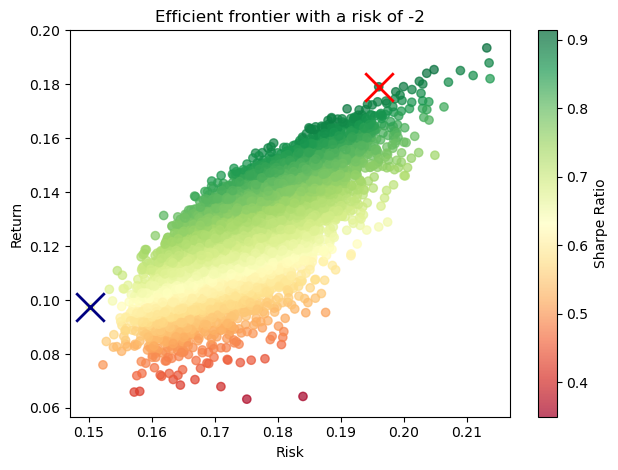

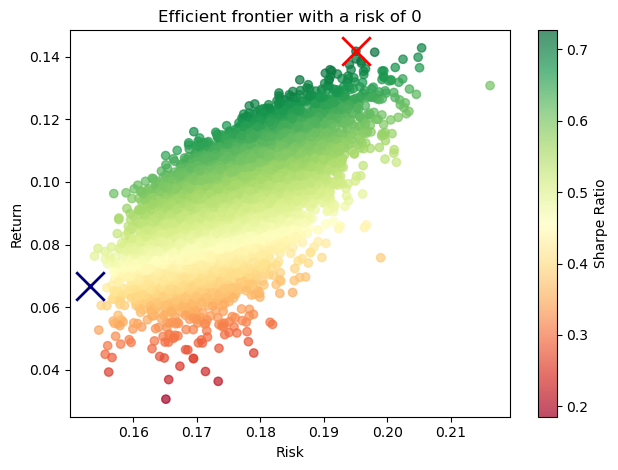

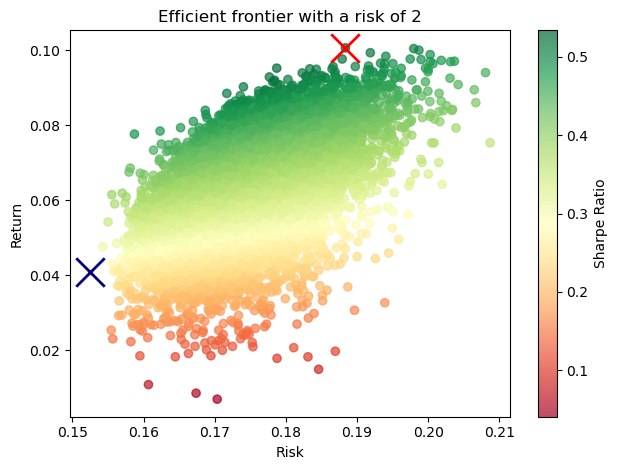

In [30]:
######################################################################   Plotting the efficient frontier   ######################################################################

# Creating plot
for r in risk:
    plt.scatter(x=risk_df[r]['Volatility'], c=risk_df[r]['Sharpe Ratio'], y=risk_df[r]['Returns'], cmap='RdYlGn', alpha=0.7)
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.title(f'Efficient frontier with a risk of {r}')
    plt.colorbar(label='Sharpe Ratio')

    # Minimum Volatility ratio shown as a navy cross
    plt.scatter(min_df[r]['Volatility'], min_df[r]['Returns'], marker="x", linewidths=2, color='navy', s=420)

    # Optimal Sharpe ratio shown as a red cross
    plt.scatter(opt_df[r]['Volatility'], opt_df[r]['Returns'], marker="x", linewidths=2, color='red', s=420)
    plt.tight_layout()
    plt.show()

In [31]:
######################################################################   Running the numerical optimization with risk-aversion   ######################################################################

# Printing matrics for a better view:
def print_array(list):
    print('')
    for i,p in zip(list,['Return       ','Volatility   ','Sharpe Ratio ']):
        print(p,np.round(i,4))
    print('')

# Helping value for overview
overview_count=len(overview)

# Optimization 
for h,x in enumerate(risk):
    def func_opt(weights):
        
        # Weights
        weights = np.array(weights)

        # Annualize returns
        returns = np.sum((l_return.mean() * weights) * 252)-x/2*np.dot(np.dot(l_return.cov() * 252, weights), weights)-interest_rate.mean()/100

        # Annualize volatility
        volatility = np.sqrt(np.dot(weights.T, np.dot(l_return.cov() * 252, weights)))

        # Sharpe ratio
        sharpe = returns / volatility

        return np.array([returns, volatility, sharpe])


    
    def neg_sharpe_opt(weights):
        return func_opt(weights)[2]**(-1)

    def volatility_opt(weights):
        return func_opt(weights)[1]  

    def add_up(weights):
        return np.sum(weights) - 1
    
    # Making sure we can maximum invest 100% in one stock
    bounds = tuple((0, 1) for symbol in range(len(df.columns)))

    # Weights can't sum to more than 1
    constraints = ({'type': 'eq', 'fun': add_up})

    # Even initial guess defined by the length of tickers
    init_guess = len(df.columns) * [1 / len(df.columns)]

    # Minimize for negative sharpe ratio
    optimized_sharpe = scipy.optimize.minimize(neg_sharpe_opt, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    # Minimize for volatility
    optimized_volatility = scipy.optimize.minimize(volatility_opt, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    # Getting values from func_opt (return, volatility and sharpe ratio)
    optimized_metrics = func_opt(optimized_sharpe.x)
    optimized_metrics_v = func_opt(optimized_volatility.x)

    # For our overview
    add_overview=pd.DataFrame(optimized_metrics).T
    add_overview.columns = ['Returns', 'Volatility', 'Sharpe Ratio']
    add_overview['Portfolio Weights']=[np.round(optimized_sharpe.x.tolist(),6)]
    add_overview['Model focusing on Sharpe Ratio']=all_models[h+overview_count]
    overview[all_models[h+overview_count]]=add_overview

    #Optimization
    print('')
    print(f'OPTIMIZED SHARPE RATIO WITH A RISK OF {x}:')
    display(optimized_sharpe)
    
    print('.'*100)
    print('')
    print(f'OPTIMIZED SHARPE RATIO WEIGHTS WITH A RISK OF {x}:')
    display((optimized_sharpe.x))

    print('.'*100)
    print('')
    print(f'OPTIMIZED SHARPE RATIO METRICS WITH A RISK OF {x}:')
    print_array(optimized_metrics)
    print('='*100)

    #Volatility
    print('')
    print(f'OPTIMIZED VOLATILITY RATIO WITH A RISK OF {x}:')
    display(optimized_volatility)

    print('.'*100)
    print('')
    print(f'OPTIMIZED VOLATILITY RATIO WEIGHTS WITH A RISK OF {x}:')
    display((optimized_volatility.x))

    print('.'*100)
    print('')
    print(f'OPTIMIZED VOLATILITY RATIO METRICS WITH A RISK OF {x}:')
    print_array(optimized_metrics_v)
    print('='*100)


OPTIMIZED SHARPE RATIO WITH A RISK OF -2:


     fun: 1.0046732768344626
     jac: array([-0.34052899, -0.34034349, -0.3397688 , -0.21102554, -0.15026933,
       -0.27997075, -0.17288756,  0.10651247, -0.34011374,  0.29306827])
 message: 'Optimization terminated successfully'
    nfev: 99
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.35033875e-01, 7.69070791e-01, 3.33880815e-02, 6.58381769e-17,
       0.00000000e+00, 5.06864516e-17, 2.14672030e-17, 3.07777892e-17,
       6.25072526e-02, 0.00000000e+00])

....................................................................................................

OPTIMIZED SHARPE RATIO WEIGHTS WITH A RISK OF -2:


array([1.35033875e-01, 7.69070791e-01, 3.33880815e-02, 6.58381769e-17,
       0.00000000e+00, 5.06864516e-17, 2.14672030e-17, 3.07777892e-17,
       6.25072526e-02, 0.00000000e+00])

....................................................................................................

OPTIMIZED SHARPE RATIO METRICS WITH A RISK OF -2:

Return        0.2507
Volatility    0.2519
Sharpe Ratio  0.9953


OPTIMIZED VOLATILITY RATIO WITH A RISK OF -2:


     fun: 0.14709072657751
     jac: array([0.14980816, 0.15979913, 0.14685055, 0.14725337, 0.14721833,
       0.14683157, 0.17169244, 0.14769375, 0.15805628, 0.14681187])
 message: 'Optimization terminated successfully'
    nfev: 122
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO WEIGHTS WITH A RISK OF -2:


array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO METRICS WITH A RISK OF -2:

Return        0.0789
Volatility    0.1471
Sharpe Ratio  0.5365


OPTIMIZED SHARPE RATIO WITH A RISK OF 0:


     fun: 1.3137701610148718
     jac: array([-0.17453758, -0.17443815, -0.17472994, -0.17504682, -0.0708501 ,
       -0.17430748,  0.11643162,  0.57389393, -0.17429586,  0.85001394])
 message: 'Optimization terminated successfully'
    nfev: 88
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.23730396e-01, 4.65558101e-01, 5.76400984e-02, 1.96841930e-02,
       0.00000000e+00, 2.03460055e-01, 0.00000000e+00, 0.00000000e+00,
       1.29927157e-01, 1.67919200e-16])

....................................................................................................

OPTIMIZED SHARPE RATIO WEIGHTS WITH A RISK OF 0:


array([1.23730396e-01, 4.65558101e-01, 5.76400984e-02, 1.96841930e-02,
       0.00000000e+00, 2.03460055e-01, 0.00000000e+00, 0.00000000e+00,
       1.29927157e-01, 1.67919200e-16])

....................................................................................................

OPTIMIZED SHARPE RATIO METRICS WITH A RISK OF 0:

Return        0.1618
Volatility    0.2126
Sharpe Ratio  0.7612


OPTIMIZED VOLATILITY RATIO WITH A RISK OF 0:


     fun: 0.14709072657751
     jac: array([0.14980816, 0.15979913, 0.14685055, 0.14725337, 0.14721833,
       0.14683157, 0.17169244, 0.14769375, 0.15805628, 0.14681187])
 message: 'Optimization terminated successfully'
    nfev: 122
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO WEIGHTS WITH A RISK OF 0:


array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO METRICS WITH A RISK OF 0:

Return        0.0573
Volatility    0.1471
Sharpe Ratio  0.3895


OPTIMIZED SHARPE RATIO WITH A RISK OF 2:


     fun: 1.774224245223377
     jac: array([0.23052643, 0.23051086, 0.23056288, 0.23104182, 0.26031061,
       0.23117055, 0.89461742, 1.7082428 , 0.23091976, 2.17304173])
 message: 'Optimization terminated successfully'
    nfev: 92
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([9.79953359e-02, 3.28531862e-01, 6.04133796e-02, 1.63463846e-01,
       2.27495754e-16, 2.59284069e-01, 7.53922034e-18, 0.00000000e+00,
       9.03115071e-02, 0.00000000e+00])

....................................................................................................

OPTIMIZED SHARPE RATIO WEIGHTS WITH A RISK OF 2:


array([9.79953359e-02, 3.28531862e-01, 6.04133796e-02, 1.63463846e-01,
       2.27495754e-16, 2.59284069e-01, 7.53922034e-18, 0.00000000e+00,
       9.03115071e-02, 0.00000000e+00])

....................................................................................................

OPTIMIZED SHARPE RATIO METRICS WITH A RISK OF 2:

Return        0.1058
Volatility    0.1877
Sharpe Ratio  0.5636


OPTIMIZED VOLATILITY RATIO WITH A RISK OF 2:


     fun: 0.14709072657751
     jac: array([0.14980816, 0.15979913, 0.14685055, 0.14725337, 0.14721833,
       0.14683157, 0.17169244, 0.14769375, 0.15805628, 0.14681187])
 message: 'Optimization terminated successfully'
    nfev: 122
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO WEIGHTS WITH A RISK OF 2:


array([3.73711766e-18, 6.10845422e-18, 5.33997026e-02, 2.98111485e-01,
       2.71794451e-01, 2.02290386e-01, 5.59043660e-18, 3.43495972e-02,
       3.36172639e-18, 1.40054378e-01])

....................................................................................................

OPTIMIZED VOLATILITY RATIO METRICS WITH A RISK OF 2:

Return        0.0356
Volatility    0.1471
Sharpe Ratio  0.2424



## <a id='toc1_'></a>[Conclusion](#toc0_)



**As expected the numerical optimization generated more efficient portfolio allocations than the simple Monte Carlo setup did**

In conclusion, compared to straightforward Monte Carlo simulations, the numerical optimization process offers a more precise and complex approach to portfolio optimization. As we increase the number of simulations we see that the Sharpe Ratio results for the different models converge towards the results from the numerical optimization. Numerical optimization enables investors and portfolio managers to make more informed decisions, maximize risk-adjusted returns, and achieve more efficient and effective resource allocation in the financial markets by utilizing cutting-edge mathematical algorithms, computational power, and the capability to take specific risk factors and constraints into account. The main results from the original analysis can be seen below:

**Extended Model**

In our extended model we incorporate the risk-aversion parameter from the Markowitz model (MVO) and replaced the expected return with the new model taking human risk-aversion into account before calculating the Sharpe Ratio. This new term can be interpreted in several ways, for instance a negative expectation to macroeconomic conditions would result in the investor being more risk-averse and therfore require a higher return compared to each unit of risk taken. We simulated this new model with Monte Carlo and Numerical optimization, as expected the numerical optimization did the best job and found the highest Sharpe Ratio. 

We would expect the more risk-averse investors to chose a portfolio with a lower Sharpe Ratio than the risk-seeking investors - this is exactly what we saw from running the model, the results can be seen below:

In [33]:
#Giving a full overview on the different models optimized on Sharpe Ratio
overview = pd.concat(overview, axis=0)
overview.set_index("Model focusing on Sharpe Ratio", inplace=True)
overview

,Returns,Volatility,Sharpe Ratio,Portfolio Weights
Model focusing on Sharpe Ratio,,,,
Monte Carlo,0.140703,0.196008,0.717844,"[0.070156, 0.22848, 0.154768, 0.065421, 0.036352, 0.144617, 0.043678, 0.017559, 0.232672, 0.006296]"
Numerical Optimization,0.161798,0.212566,0.761168,"[0.12373, 0.465558, 0.05764, 0.019684, 0.0, 0.20346, 0.0, 0.0, 0.129927, 0.0]"
Monte Carlo Extended model Risk-Seeking,0.179122,0.196008,0.913852,"[0.0233, 0.142364, 0.191303, 0.159036, 0.020196, 0.15423, 0.056286, 0.031633, 0.181496, 0.040156]"
Monte Carlo Extended model Risk-Neutral,0.141749,0.19508,0.726618,"[0.186891, 0.133874, 0.117986, 0.105399, 0.12448, 0.190488, 0.019548, 0.010943, 0.087709, 0.022681]"
Monte Carlo Extended model Risk-Averse,0.100579,0.188361,0.533968,"[0.216655, 0.274278, 0.078309, 0.121217, 0.141203, 0.110655, 0.013991, 0.011651, 0.030743, 0.001298]"
Numerical Optimization Risk-Seeking,0.250719,0.251891,0.995348,"[0.135034, 0.769071, 0.033388, 0.0, 0.0, 0.0, 0.0, 0.0, 0.062507, 0.0]"
Numerical Optimization Risk-Neutral,0.161798,0.212566,0.761168,"[0.12373, 0.465558, 0.05764, 0.019684, 0.0, 0.20346, 0.0, 0.0, 0.129927, 0.0]"
Numerical Optimization Risk-Averse,0.105819,0.187746,0.563627,"[0.097995, 0.328532, 0.060413, 0.163464, 0.0, 0.259284, 0.0, 0.0, 0.090312, 0.0]"
